In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [16]:
sr = pd.Series( [90,90,55,60,76,80,76,88,30,25],
               name="국어점수" )
sr.index=['홍길동','이순신','임꺽정','정난정',
         '이이','이황','정도전','김철수1',
          '김철수2','김철수3']
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

In [17]:
fruit=pd.Series( [10,20,30,50],index=['사과','딸기','포도','수박'],name='과일' )
fruit

사과    10
딸기    20
포도    30
수박    50
Name: 과일, dtype: int64

In [18]:
# 1. 이름순으로 정렬하시오

sr.sort_index()
 

김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64

In [8]:
# 2. 키보드로 입력 받아 검색된 이름의 점수를 구하시오

name = input('이름:')
sr[name]

이름:이순신


90

In [102]:
# 3. 데이터를 다음과 같이 출력하시오

#(0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
#---------------------
#    이름    국어   학점
#---------------------
#    홍길동  70     C
#    ...
#    김철수3 25      F


df = pd.DataFrame(data = sr)
df.reset_index(inplace = True)

In [103]:
df.rename(columns = {'index':'이름','국어점수':'국어'}, inplace = True)
df

,이름,국어
0,홍길동,90
1,이순신,90
2,임꺽정,55
3,정난정,60
4,이이,76
5,이황,80
6,정도전,76
7,김철수1,88
8,김철수2,30
9,김철수3,25


In [104]:
def func(x):

    if x >= 90 and x <= 100 :
        y ='A'
    elif x >=80 and x <90:
        y ='B'
    elif x >= 70 and x <80:
        y ='C'
    elif x >= 60 and x <70:
        y ='D'
    elif x >= 0 and x <60:
        y ='F'
        
    return y

df['학점'] = df['국어'].apply(func)

df

,이름,국어,학점
0,홍길동,90,A
1,이순신,90,A
2,임꺽정,55,F
3,정난정,60,D
4,이이,76,C
5,이황,80,B
6,정도전,76,C
7,김철수1,88,B
8,김철수2,30,F
9,김철수3,25,F


In [40]:
y = []
for x in df['국어']:
    if x >= 90 and x <= 100 :
        y.append('A')
    elif x >=80 and x <90:
        y.append('B')
    elif x >= 70 and x <80:
        y.append('C')
    elif x >= 60 and x <70:
        y.append('D')
    elif x >= 0 and x <60:
        y.append('F')
        

df['학점'] = y
df


,이름,국어,학점
0,홍길동,90,A
1,이순신,90,A
2,임꺽정,55,F
3,정난정,60,D
4,이이,76,C
5,이황,80,B
6,정도전,76,C
7,김철수1,88,B
8,김철수2,30,F
9,김철수3,25,F


In [131]:
# 4. 국어 점수 50점 이하는 가산점 20%, / 50점 초과는 가산점 10%를 부여하시오

x = df[df['국어'] <= 50]['국어']
y =  df[df['국어'] > 50]['국어']

s = pd.concat([x * 1.2, y*1.1])

df['점수(가산점)'] = s
df

,이름,국어,학점,점수(가산점)
0,홍길동,90,A,99.0
1,이순신,90,A,99.0
2,임꺽정,55,F,60.5
3,정난정,60,D,66.0
4,이이,76,C,83.6
5,이황,80,B,88.0
6,정도전,76,C,83.6
7,김철수1,88,B,96.8
8,김철수2,30,F,36.0
9,김철수3,25,F,30.0


In [106]:
# 5. 국어점수 10%, 50%, 90%에 해당하는 값을 구하시오
df['국어'].quantile(q = [0.1,0.5,0.9])
 

0.1    29.5
0.5    76.0
0.9    90.0
Name: 국어, dtype: float64

In [107]:
# 6. 각 국어점수에 대한 개수를 구하시오

df['국어'].value_counts() 

90    2
76    2
55    1
60    1
80    1
88    1
30    1
25    1
Name: 국어, dtype: int64

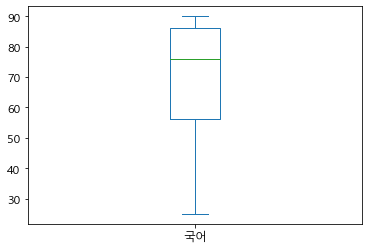

In [108]:
# 7. 국어점수에 대한 boxplot을 그리시오

df['국어'].plot(kind = 'box')
plt.show()
 

In [129]:
# 8. 국어점수를 10개(0~100점을) 로 분할한 경우 각 점수별 도수분포표를 구하고(아래이미지참조) 히스토그램을 구하시오


(pd.cut(df['국어'], bins = [-1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100], right = True)).value_counts().sort_index()


(-1, 10]     0
(10, 20]     0
(20, 30]     2
(30, 40]     0
(40, 50]     0
(50, 60]     2
(60, 70]     0
(70, 80]     3
(80, 90]     3
(90, 100]    0
Name: 국어, dtype: int64

In [130]:
d = np.arange(0,101,10)
(pd.cut(df['국어'], bins = d, right = True)).value_counts().sort_index()

(0, 10]      0
(10, 20]     0
(20, 30]     2
(30, 40]     0
(40, 50]     0
(50, 60]     2
(60, 70]     0
(70, 80]     3
(80, 90]     3
(90, 100]    0
Name: 국어, dtype: int64

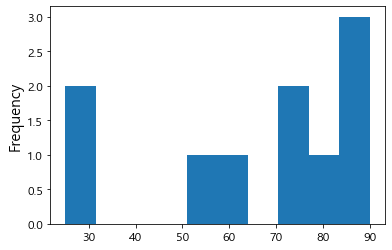

In [110]:
df['국어'].plot(kind = 'hist', bins = 10)
plt.show()
 

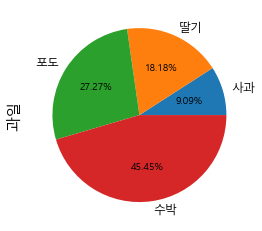

In [111]:
#9. 과일의 비율을 파이차트로 그리시오

fruit.plot(kind ='pie', autopct = '%.2f%%')
plt.show()